## TASKS

### Task 1 
Write functional programming code to apply a list of functions on a list of integers. Explain how it works as well and how it relates to functional programing.

### Task 2 
Find the greatest common divisor of a list of numbers using Reduce. Explain how the code works as well. Explain how it works as well and how it relates to functional programing.

### Task 3 
Write a function groupby_demonstrator that takes as a list of tuples as an input (arg data) as well as boolean argument (verify_sorted). If verify_sorted is true, the list is sorted by the first key (0-th tuple element), otherwise it is not sorted.
The function should print out key-value pairs by groups (as output from Python groupby). The print statements between groups should have an empty line. Print statements inside-group should not have empty lines in between (just new lines between records).

Add a decorator ‘ensure_sourted_grouper’ that overrides the grouping, by making sure that the list is sorted when an argument ‘verify_sorted’ = True is passed. Otherwise, “You didn’t enforce the order” is printed to the console.


## Solutions

### Applying Unary Functions to list of arguments

In [2]:
def multiply(x):
    return (x*x)
def add(x):
    return (x+x)

def exponentiate(x):
    return 2**x

funcs = [multiply, add,exponentiate]
for i in range(2):
    print(i)
    value = list(map(lambda x: x(i), funcs))
    print(value)

# but since For-loop is a signature of Imperative Programming, it is better to use purely functional programming

from functools import reduce

list(map(lambda x,y: x(y),funcs,l1))

0
[0, 0, 1]
1
[1, 2, 2]


## Building a Higher Order Function to Ensure that Another function works in an expected manner

In [4]:
### Use of Decorator to Get Itertools Groupby to work in a sorted fashion, similarly to Pandas Groupby

from itertools import groupby

things = [("car", "Audi"),  ("vehicle", "tram"), ("person", "duck"), ("plant", "cactus"), 
          ("vehicle", "speed boat"), ("vehicle", "school bus")]

for key, group in groupby(things, lambda x: x[0]):
    for thing in group:
        print("A %s is a %s." % (thing[1], key))
    print(" ")

A Audi is a car.
 
A tram is a vehicle.
 
A duck is a person.
 
A cactus is a plant.
 
A speed boat is a vehicle.
A school bus is a vehicle.
 


In [5]:
from itertools import groupby
from functools import wraps

def ensure_sorted_grouper(fun):
    @wraps(fun)
    def wrapper_calling_fun(*args,**kwargs):
        if kwargs.get("ensure_order")=="yes":
            kwargs['verify_sorted']=True
            fun(*args,**kwargs)
        else :
            print("You didn't enforce ensured order!")
    return wrapper_calling_fun

things = [("car", "Audi"), ("person", "Tom"), ("plant", "cactus"), 
          ("car", "BMW"), ("plant", "tomato plant"), ("person", "Michael")]


@ensure_sorted_grouper
def groupby_demonstrator(data=things,verify_sorted = False,**kwargs):
    print(f"The raw data looks like {str(things)}\n")
    if verify_sorted == True:
        data = sorted(data, key = lambda x : x[0],reverse=False) 

    for key, group in groupby(data, lambda x: x[0]):
        for thing in group:
            print("%s is a %s." % (thing[0], thing[1]))
        print(" ")

groupby_demonstrator(verify_sorted=False,ensure_order="yes")

The raw data looks like [('car', 'Audi'), ('person', 'Tom'), ('plant', 'cactus'), ('car', 'BMW'), ('plant', 'tomato plant'), ('person', 'Michael')]

car is a Audi.
car is a BMW.
 
person is a Tom.
person is a Michael.
 
plant is a cactus.
plant is a tomato plant.
 


In [6]:
for key,group in groupby(things, lambda x: x[0]):
    for it in group:
        print("That key %s has value %s" % (it[0],it[1]))

That key car has value Audi
That key person has value Tom
That key plant has value cactus
That key car has value BMW
That key plant has value tomato plant
That key person has value Michael


In [7]:
!pip install perfplot --user

### Interlude : Comparing Concatenation Operator Running Times

 57%|█████▋    | 4/7 [00:02<00:01,  1.98it/s]
/home/alari/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  self.set_xlim(upper, lower, auto=None)


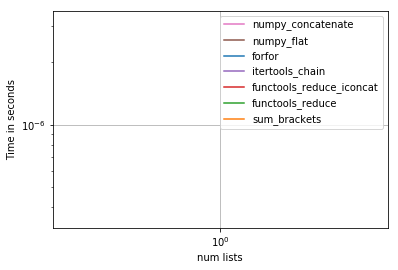

In [2]:
%matplotlib inline

import functools
import itertools
import numpy
import operator
import perfplot


def forfor(a):
    return [item for sublist in a for item in sublist]


def sum_brackets(a):
    return sum(a, [])

########################## FUNCTIONAL PROGRAMMING OPERATORS ###################

def conjunction(*conditions):
    return functools.reduce(np.logical_and, conditions)

def disjunction(*conditions):
    return functools.reduce(np.logical_or, conditions)


def functools_reduce(a):
    return functools.reduce(operator.concat, a)


def functools_reduce_iconcat(a):
    return functools.reduce(operator.iconcat, a, [])

##################################################################################


def itertools_chain(a):
    return list(itertools.chain.from_iterable(a))


def numpy_flat(a):
    return list(numpy.array(a).flat)


def numpy_concatenate(a):
    return list(numpy.concatenate(a))


perfplot.show(
    setup=lambda n: [list(range(10))] * n,
    kernels=[
        forfor, sum_brackets, functools_reduce, functools_reduce_iconcat,
        itertools_chain, numpy_flat, numpy_concatenate
        ],
    n_range=[2**k for k in range(16)],
    logx=True,
    logy=True,
    xlabel='num lists'
    )

## Role of Functional Programming in Building Data Pipeline in Pandas

In [3]:
import pandas as pd
import numpy as np
import functools
from functools import partial
def conjunction(*conditions):
    return functools.reduce(np.logical_and, conditions)

def disjunction(*conditions):
    return functools.reduce(np.logical_or, conditions)

lambda1 = lambda x: x**2 % 5 == 0
lambda2 = lambda x: x**2 % 10 == 0

################### GENERATING NECESSARY INPUTS ##########3

df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

def divisible_by_5(x):
    return x**2 % 5 == 0

def divisible_by_10(x):
    return x**2 % 10 == 0

#################################


###################### PANDAS + FUNCTIONAL STARTS ###############################

def dictionary_apply_kwargs(dicti_, **kwargs):
    """ Applies a given function to all dictionary items (values)"""
    s = dict()
    fun1 = kwargs.get('step1')
    arg1 = kwargs.get('arg1')
    for k,v in dicti_.items():
        if v is not None:
            s[k] = fun1(v,arg1)
    return s

def data_transformer(data=df,conditions=[divisible_by_10,divisible_by_5],**kwargs):
    all_true = data[data.apply(conjunction(*conditions))]
    any_true =  data[data.apply(disjunction(*conditions))]
    dict_ = {'any': any_true, 'all': all_true,"step2":None}
    if kwargs is not None:
        step1 = kwargs.get("step1")
        step2 = kwargs.get("step2")
    dictionary_apply_kwargs(dicti_=dict_,**kwargs)
    
    return dict_

########################## RUNTIME ##########################
arg_one =  50
kwargs = {'step1':pd.DataFrame.sub,'arg1':arg_one}
from_step_1 = data_transformer(**kwargs)

In [4]:
from_step_1

{'any':        A     B     C     D
 0    NaN   NaN   NaN   NaN
 1    NaN   NaN   NaN   NaN
 2    NaN   NaN   NaN   NaN
 3    NaN  60.0   NaN   NaN
 4    NaN   NaN   NaN   NaN
 5    NaN   NaN  50.0  90.0
 6    NaN   NaN   NaN   NaN
 7    NaN   NaN   NaN   NaN
 8    NaN   NaN   NaN   NaN
 9    NaN   NaN   NaN   NaN
 10   NaN   NaN   NaN   NaN
 11   NaN   NaN   NaN   NaN
 12   NaN   NaN   NaN   NaN
 13   NaN   NaN   NaN   NaN
 14   NaN   NaN   NaN   NaN
 15   NaN   NaN   NaN   NaN
 16   NaN   NaN   NaN  20.0
 17   NaN   NaN   NaN   NaN
 18   NaN   NaN   NaN   NaN
 19   NaN   NaN   NaN   NaN
 20   NaN   NaN   NaN   0.0
 21   NaN   0.0   NaN   NaN
 22   NaN   NaN   NaN   NaN
 23   NaN   NaN   NaN   NaN
 24   NaN  10.0   NaN   NaN
 25   NaN   NaN   NaN   NaN
 26   NaN   NaN   NaN   NaN
 27   NaN  60.0   NaN   NaN
 28   NaN   NaN   NaN   NaN
 29   NaN   NaN   NaN   NaN
 ..   ...   ...   ...   ...
 70   NaN  80.0   NaN   NaN
 71  10.0   NaN   NaN   NaN
 72   NaN   NaN   NaN   NaN
 73   NaN  10